In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import splat
import numpy
import astropy.units as u
from astropy import constants as const 
import copy
from scipy.integrate import trapz        # for numerical integration
from scipy.interpolate import interp1d
%matplotlib inline

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
import os

In [3]:
#sys.path

In [4]:
fl='/users/caganze/research/J1624/data/nires_J1624-3212_20200720.fits'

In [5]:
data=fits.open(fl)[0].data

In [6]:
spectra=[]

In [7]:
for idx in np.arange(4):
    spectra.append(splat.Spectrum(wave=data[idx][0], \
                                  flux=data[idx][1],
                                  noise=data[idx][2],
                                  instrument='NIRES'))

In [8]:
s1=splat.stitch(spectra[0], spectra[1])
s2=splat.stitch(spectra[2], spectra[3])

In [9]:
#s1.flux

In [10]:
s=splat.stitch(s1, s2)

In [11]:
splat.measureEWSet(s,ref='rojas')

{'reference': 'Rojas et al. (2012)',
 'bibcode': '2012ApJ...748...93R',
 'nai': {'ew': <Quantity 7.46927425 Angstrom>,
  'ew_unc': <Quantity 0.01562696 Angstrom>,
  'line_center': <Quantity 2.207 micron>,
  'line_center_unc': <Quantity 4.4408921e-16 micron>,
  'rv': <Quantity 0. km / s>,
  'rv_unc': <Quantity 0. km / s>},
 'cai': {'ew': <Quantity 3.67163925 Angstrom>,
  'ew_unc': <Quantity 0.01802293 Angstrom>,
  'line_center': <Quantity 2.2635 micron>,
  'line_center_unc': <Quantity 0. micron>,
  'rv': <Quantity 0. km / s>,
  'rv_unc': <Quantity 0. km / s>}}

In [12]:
#

In [13]:
#using Adam's metallicity measurements
import splat.empirical as spem
for r in ['rojas','terrien','mann13','mann14','newton']:
    spem.metallicity(s,ref=r,verbose=True, plot=True)


Computing [Fe/H] from Rojas et al. (2012) (2012ApJ...748...93R), valid for M0-M5, ??? < [Fe/H] < ???
K-band [Fe/H] = 0.23+/-0.10
K-band [M/H] = 0.17+/-0.10
Computing [Fe/H] from Terrrien et al. (2012) (2012ApJ...747L..38T), valid for M0--M5, -0.25 < [Fe/H] < +0.3
K-band [Fe/H] = 0.35+/-0.12
H-band [Fe/H] = -0.08+/-0.12
Computing [Fe/H] from Mann et al. (2013) (2013AJ....145...52M), valid for K5--M5, -1.04 < [Fe/H] < +0.56
J-band [Fe/H] = 0.43+/-0.07
J-band [M/H] = 0.39+/-0.08
H-band [Fe/H] = -0.06+/-0.07
H-band [M/H] = 0.02+/-0.08
K-band [Fe/H] = 0.50+/-0.07
K-band [M/H] = 0.35+/-0.08
Computing [Fe/H] from Mann et al. (2014) (2014AJ....147..160M), valid for M4.5--M9.5, -0.58 < [Fe/H] < +0.56
K-band [Fe/H] = 0.29+/-0.07
Computing [Fe/H] from Newton et al. (2014) (2014AJ....147...20N), valid for M1--M5, -1.0 < [Fe/H] < +0.35
K-band [Fe/H] = 0.30+/-0.12


In [48]:
s.reset()

In [50]:
spem.metallicity(s,ref='mann14',verbose=True, plot=True, 
                 filename='/users/caganze/research/J1624/figures/metallicity.pdf')

Computing [Fe/H] from Mann et al. (2014) (2014AJ....147..160M), valid for M4.5--M9.5, -0.58 < [Fe/H] < +0.56
K-band [Fe/H] = 0.29+/-0.07


{'reference': 'Mann et al. (2014)',
 'bibcode': '2014AJ....147..160M',
 'measures': {'feh': [0.290922749741257, 0.07021855034548777]}}

In [46]:
spem.metallicity

In [15]:
import kastredux
FUNITS=u.erg/u.micron/u.s/(u.cm**2)
WUNITS=u.micron
#f='/users/caganze/research/J1624/data/kastBLUE_J1624-3212_20200722.fits'
#fr='/users/caganze/research/J1624/data/kastRED_J1624-3212_20200722.fits'
#sblue=kastredux.readSpectrum(f, flux_unit=FUNITS)
fr='/users/caganze/research/J1624/data/kastRED_J1624-3212_20210404.txt'
sred=kastredux.readSpectrum(fr)

In [16]:
#sblue.convertFlux(FUNITS)
#sblue.convertWave(WUNITS)
#sred.convertFlux(FUNITS)
sred.convertWave(WUNITS)

In [17]:
sred.flux

<Quantity [0., 0., 0., ..., 0., 0., 0.] erg / (Angstrom cm2 s)>

In [18]:
#sred.flux.value.mean()/sblue.flux.value.mean()

('M5.0', 0.5)

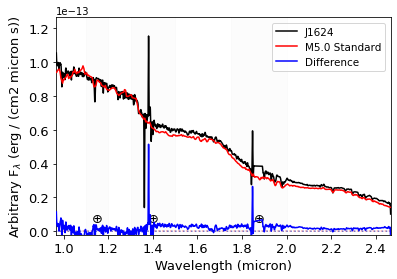

In [19]:
s.smooth(30)
s.name='J1624'
splat.classifyByStandard(s,plot=True,method='kirkpatrick',telluric=True, save=True,
                         filename='/users/caganze/research/J1624/figures/J1624_nirclassif.pdf')

In [20]:
#sblue0=splat.Spectrum(wave=sblue.wave, flux=sblue.flux, noise=sblue.variance**0.5)
sred0=splat.Spectrum(wave=sred.wave, flux=sred.flux, noise=sred.variance**0.5)

In [21]:
#sred.flux

In [22]:
#plt.plot(s.wave, s.flux)

In [23]:
#gravity classification
#splat.classifyGravity(s, verbose=True) #doesn't work for <M6

In [24]:
#bkll

In [25]:
#s.reset()

In [26]:
#s.fluxCalibrate()

In [27]:
fold='/users/caganze/research/J1624/data/palomar_dbsp/'

In [28]:
f0=fold+'w1624m3212_b.dat'
f1=fold+'w1624m3212_r.dat'

In [29]:
from astropy.io import ascii
df0=ascii.read(f0).to_pandas()
df1=ascii.read(f1).to_pandas()

In [30]:
#create a mask array
#arr0=

In [31]:
spal_blue=splat.Spectrum(wave=df0.col1.values/10000*u.micron, flux=df0.col2.values)
spal_red=splat.Spectrum(wave=df1.col1.values/10000*u.micron, flux=df1.col2.values)
sr=splat.Spectrum(wave=sred.wave, flux=sred.flux, noise=sred.variance**0.5)

In [32]:
#spal_red.trim([0.57, 0.9])
#sr.trim([0.57, 0.9])

In [33]:
sr.wave.max()

<Quantity 0.93239807 micron>

In [34]:
#spal_blue.fluxCalibrate('GAIA_G', 12.6265, apparent=True, notch=[0.])
#spal_red.fluxCalibrate('Gaia_G', 12.6265)   
sr.fluxCalibrate('Gaia_R',11.0375, notch=[0.58, 0.93 ])
s.fluxCalibrate('MKO H', 8.470 )

In [35]:
#!open  ~/research/splat/splat/core.py

In [36]:
sr.fluxCalibrate?

In [37]:
splat.filterMag(spal_red, 'PANSTARRS_G')


(56.53682358233583, 2.1316282072803006e-14)

In [38]:
splat.filterMag(sr,'PANSTARRS_G', notch=[0.58, 0.93 ])

(11.037499999999998, 0.0053095185009120515)

In [39]:
spal_red.flux.max()/(sr.flux.max())

<Quantity 5.36993734e-16>

Text(0.5, 0, 'Wave (micron)')

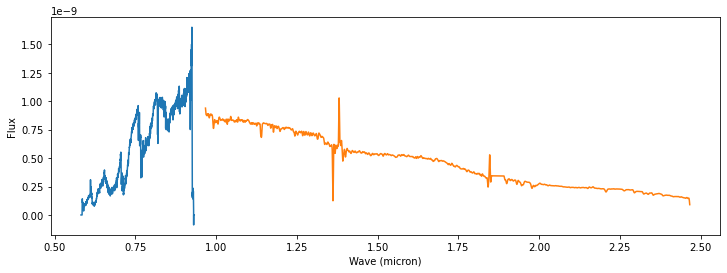

In [40]:

fig, ax=plt.subplots(figsize=(12, 4))
#plt.plot(spal_red.wave, spal_red.flux/1e4)
plt.plot(sr.wave, sr.flux)
plt.plot(s.wave, s.flux)
#plt.xlim([0.57, 1.0])
#plt.ylim([5e-15, 3e-13])
#plt.minorticks_on()
#plt.yscale('log')

#plt.xscale('log')
plt.ylabel('Flux')
plt.xlabel('Wave (micron)')

In [41]:
total_wave=np.concatenate([sr.wave, s.wave]).value
total_flux=np.concatenate([sr.flux, s.flux]).value
total_noise=np.concatenate([sr.noise, s.noise]).value

In [42]:
mask= np.logical_or.reduce([ [total_wave < 0.6], 
                            [(total_wave > 0.54) & (total_wave <0.57)],
                            [(total_wave > 0.9)& (total_wave <1.)],
                          [(total_wave >1.350) & (total_wave<1.425)],
                        [(total_wave >1.80) & (total_wave<1.92)],
                        [total_wave > 2.45]])

In [43]:

#createa a complete spectrun


In [44]:
df=pd.DataFrame()
df['wave (micron)']=total_wave
df['flux (funits)']=total_flux
df['mask']=mask.flatten()
df['noise']=total_noise
df.to_csv('/users/caganze/research/J1624/data/j1624_kast_nires.csv')

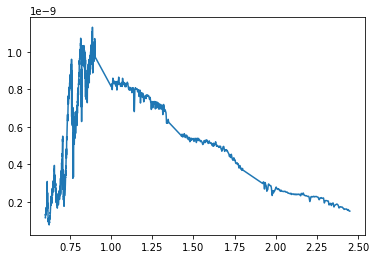

In [45]:
plt.plot(total_wave[~mask.flatten()], total_flux[~mask.flatten()])
#plt.xlim([0.7, 0.9])
#plt.yscale('log')
#plt.xscale('log')

#\